In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import h5py

In [2]:
# Import the HAR dataset
x_train_file = open('../HAR/train/X_train.txt', 'r')
y_train_file = open('../HAR/train/y_train.txt', 'r')
s_train_file = open('../HAR/train/subject_train.txt', 'r')

x_test_file = open('../HAR/test/X_test.txt', 'r')
y_test_file = open('../HAR/test/y_test.txt', 'r')
s_test_file = open('../HAR/test/subject_test.txt', 'r')

# Create empty lists
x_train = []
y_train = []
s_train = []

x_test = []
y_test = []
s_test = []

# Mapping table for classes
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}

# Loop through datasets
for x in x_train_file:
    x_train.append([float(ts) for ts in x.split()])
    
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))
    
for s in s_train_file:
    s_train.append(int(s.rstrip('\n')))
    
for x in x_test_file:
    x_test.append([float(ts) for ts in x.split()])
    
for y in y_test_file:
    y_test.append(int(y.rstrip('\n')))

for s in s_test_file:
    s_test.append(int(s.rstrip('\n')))
    
# Convert to numpy for efficiency
x_train = np.array(x_train)
y_train = np.array(y_train)
s_train = np.array(s_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
s_test = np.array(s_test)

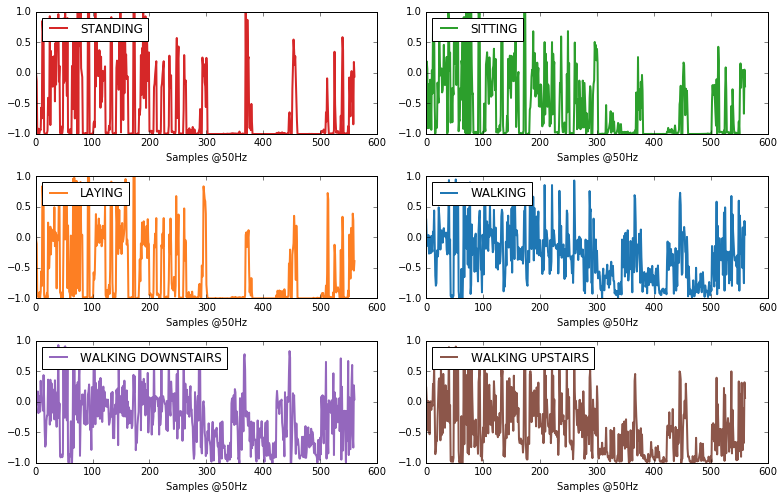

In [69]:
#Visualise?
plt.figure(figsize=(11,7))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']
for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train[r], label=labels[y_train[r]], color=colors[i], linewidth=2)
    plt.xlabel('Samples @50Hz')
    plt.legend(loc='upper left')
    plt.tight_layout()

In [17]:
# Preprocess for MEMM / HMM / CRF?
# matrices of the form: 1-hot vector for the previous tag + feature vector
# 1st observation is dropped

x_train_with_past = np.zeros((x_train.shape[0]-1,x_train.shape[1]+6))
for i in range(x_train.shape[0]-1):
    tofill = np.zeros(x_train.shape[1]+6)
    tofill[y_train[i]-1] = 1
    tofill[6:] = x_train[i+1,:]
    x_train_with_past[i,:] = tofill[:]
y_train_with_past = y_train[1:]

x_test_with_past = np.zeros((x_test.shape[0]-1,x_test.shape[1]+6))
for i in range(x_test.shape[0]-1):
    tofill = np.zeros(x_test.shape[1]+6)
    tofill[y_test[i]-1] = 1
    tofill[6:] = x_test[i+1]
    x_test_with_past[i,:] = tofill[:]
y_test_with_past = y_test[1:]

In [19]:
with h5py.File('../HAR/preprocessed.hdf5', "w") as f:
    f['x_train'] = x_train
    f['y_train'] = y_train
    f['s_train'] = s_train
    f['x_test'] = x_test
    f['y_test'] = y_test
    f['s_test'] = s_test
    f['x_train_with_past'] = x_train_with_past
    f['y_train_with_past'] = y_train_with_past
    f['x_test_with_past'] = x_test_with_past
    f['y_test_with_past'] = y_test_with_past